In [207]:
#merge data from several states
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import pprint
import seaborn as sns
from pprint import pprint

In [208]:
alldogs_merged = pd.read_csv('./data_all/alldogs_merged_all.csv')
#state={'CA':'Los Angeles', 'MN': 'Minneapolis', 'NY':'New York', 'TX': 'Houston'}

In [209]:
len(alldogs_merged)

1472050

In [210]:
alldogs_merged.head()

,adoption_time,age,attributes.declawed,attributes.house_trained,attributes.shots_current,attributes.spayed_neutered,attributes.special_needs,breeds.mixed,breeds.primary,breeds.secondary,...,month,name,organization_id,published_at,size,status,status_changed_at,tags,url,year
0,20,Adult,NaN,True,True,True,False,False,Japanese Chin,NaN,...,10,Madonna,CA712,2012-09-13T12:51:33+0000,Small,adopted,2012-10-04T11:36:05+0000,[],https://www.petfinder.com/dog/madonna-24113097...,2012
1,96,Adult,NaN,True,True,True,False,False,Japanese Chin,NaN,...,11,"Bess (located in Birmingam, AL)",CA712,2016-08-08T19:15:43+0000,Small,adopted,2016-11-13T08:14:08+0000,[],https://www.petfinder.com/dog/bess-located-in-...,2016
2,98,Young,NaN,True,True,True,False,True,Scottish Terrier,NaN,...,1,Madonna,TX1860,2014-10-14T09:20:08+0000,Small,adopted,2015-01-20T17:31:49+0000,[],https://www.petfinder.com/dog/madonna-30542160...,2015
3,32,Adult,NaN,True,True,True,False,False,Bullmastiff,NaN,...,3,AL - Sweetie/Birmingham,FL653,2018-02-21T00:02:35+0000,Extra Large,adopted,2018-03-25T13:18:45+0000,[],https://www.petfinder.com/dog/al-sweetie-birmi...,2018
4,16,Young,NaN,True,True,True,False,False,Bullmastiff,NaN,...,11,AL - Rosie/Prattville,FL653,2015-10-26T11:05:40+0000,Large,adopted,2015-11-11T18:28:03+0000,[],https://www.petfinder.com/dog/al-rosie-prattvi...,2015


In [5]:
state_info = pd.read_csv('stats_all.csv')
mean_adpt_time = {}
#create a dict with each state and average adoption time
for state_pos in range(1,49):
    current_state = state_info['state'][state_pos]
    key = current_state
    val = alldogs_merged[alldogs_merged['contact.address.state'] == current_state]['adoption_time'].mean()
    mean_adpt_time[key] = val
pprint(mean_adpt_time)

{'CA': 184.01237496363595,
 'MN': 102.96562054208273,
 'NY': 227.69666935576814,
 'TX': 140.0659042704393}


In [211]:
alldogs_merged.groupby('contact.address.state')['adoption_time'].mean().sort_values()

contact.address.state
MT     36.828786
WY     46.584674
ID     49.849677
SC     67.454908
NH     70.808894
MS     83.079180
PA     84.188627
CO     85.838635
OH     87.721029
VT     88.836907
IL     93.102591
ND     93.470378
WA     93.814776
MN    102.965621
RI    107.201073
MA    108.364548
WI    109.686375
MD    110.435780
VA    118.225938
LA    120.193585
ME    122.736462
AK    124.820449
AR    125.363077
UT    125.400673
TN    131.549588
AZ    138.621148
TX    140.065904
GA    141.359581
NE    144.288541
KS    153.267549
NM    162.038734
KY    166.339105
IA    166.441197
CT    167.932088
AL    169.512191
NJ    173.957788
MO    174.401168
IN    174.763227
CA    184.012375
OR    189.981649
WV    204.210876
FL    211.237100
MI    222.346728
NY    227.696669
OK    238.790731
NV    265.662577
DE    276.759936
NC    288.047769
SD    379.557841
Name: adoption_time, dtype: float64

In [212]:
alldogs_merged.head()

,adoption_time,age,attributes.declawed,attributes.house_trained,attributes.shots_current,attributes.spayed_neutered,attributes.special_needs,breeds.mixed,breeds.primary,breeds.secondary,...,month,name,organization_id,published_at,size,status,status_changed_at,tags,url,year
0,20,Adult,NaN,True,True,True,False,False,Japanese Chin,NaN,...,10,Madonna,CA712,2012-09-13T12:51:33+0000,Small,adopted,2012-10-04T11:36:05+0000,[],https://www.petfinder.com/dog/madonna-24113097...,2012
1,96,Adult,NaN,True,True,True,False,False,Japanese Chin,NaN,...,11,"Bess (located in Birmingam, AL)",CA712,2016-08-08T19:15:43+0000,Small,adopted,2016-11-13T08:14:08+0000,[],https://www.petfinder.com/dog/bess-located-in-...,2016
2,98,Young,NaN,True,True,True,False,True,Scottish Terrier,NaN,...,1,Madonna,TX1860,2014-10-14T09:20:08+0000,Small,adopted,2015-01-20T17:31:49+0000,[],https://www.petfinder.com/dog/madonna-30542160...,2015
3,32,Adult,NaN,True,True,True,False,False,Bullmastiff,NaN,...,3,AL - Sweetie/Birmingham,FL653,2018-02-21T00:02:35+0000,Extra Large,adopted,2018-03-25T13:18:45+0000,[],https://www.petfinder.com/dog/al-sweetie-birmi...,2018
4,16,Young,NaN,True,True,True,False,False,Bullmastiff,NaN,...,11,AL - Rosie/Prattville,FL653,2015-10-26T11:05:40+0000,Large,adopted,2015-11-11T18:28:03+0000,[],https://www.petfinder.com/dog/al-rosie-prattvi...,2015


In [213]:
alldogs_merged['year'].value_counts()

2010    163612
2019    149381
2015    143465
2014    142116
2016    141410
2017    138204
2018    137070
2013    134959
2012    126292
2011    107894
2009     61292
2008     12617
2020      6470
2007      4466
2006      1299
2005       896
2004       564
2003        43
Name: year, dtype: int64

In [11]:
alldogs_merged.groupby('year')['adoption_time'].mean().sort_values()

year
2016     73.414059
2017     76.365089
2012     76.758136
2019     77.032733
2015     79.491374
2018     79.584242
2013     80.056278
2014     86.780699
2020     89.714441
2011     92.026516
2008    274.882463
2006    401.583333
2009    543.729739
2007    615.247781
2010    653.359691
Name: adoption_time, dtype: float64

In [214]:
alldogs_year = alldogs_merged[alldogs_merged['year'] >= 2015]

In [215]:
alldogs_year = alldogs_year[alldogs_year['year'] <= 2019]

In [216]:
len(alldogs_year)

709530

In [217]:
alldogs_year.groupby('month')['adoption_time'].mean().sort_values()

month
8     57.733467
5     58.336647
3     58.903002
4     60.224461
6     60.682694
2     62.149868
7     63.089704
12    63.235770
11    63.978540
10    67.510244
9     72.287168
1     90.359256
Name: adoption_time, dtype: float64

In [218]:
m=alldogs_year.groupby('month')['adoption_time'].mean()

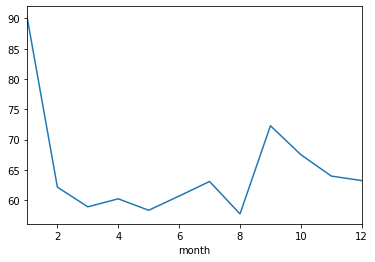

In [219]:
m.plot()

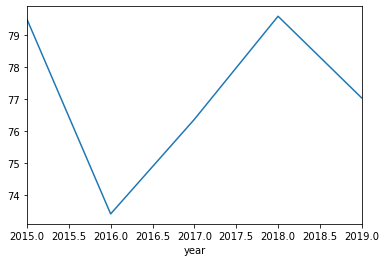

In [21]:
y=alldogs_year.groupby('year')['adoption_time'].mean()
y.plot()

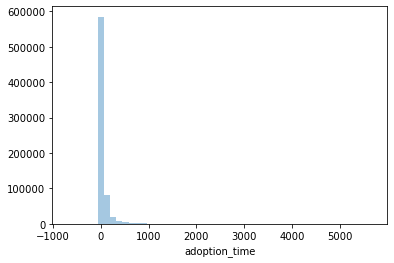

In [220]:
sns.distplot(alldogs_year['adoption_time'], kde=False)

In [221]:
#remove negative days error
alldogs_year = alldogs_year[alldogs_year['adoption_time']>=0]

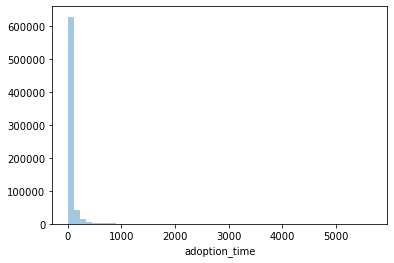

In [222]:
sns.distplot(alldogs_year['adoption_time'], kde=False)

In [224]:
alldogs_year['log_adpt_time'] = alldogs_year.apply(lambda x: np.log((x['adoption_time'])+1.1), axis=1)

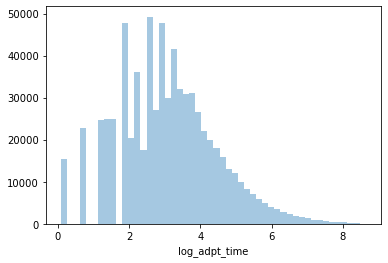

In [225]:
sns.distplot(alldogs_year['log_adpt_time'], kde=False)

In [226]:
from scipy import stats
z = (stats.zscore(alldogs_year['log_adpt_time']))
len(np.where(z >= 2.5)[0])

9707

In [227]:
alldogs_year_otl = alldogs_year[z<2.5]
len(alldogs_year_otl)

699822

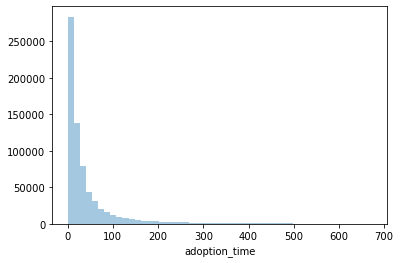

In [229]:
sns.distplot(alldogs_year_otl['adoption_time'], kde=False)

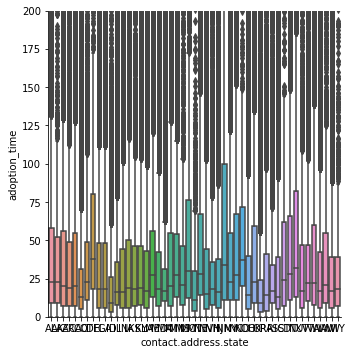

In [230]:
sizeplot3 = sns.catplot(x='contact.address.state', y='adoption_time', data=alldogs_year_otl, kind='box');
sizeplot3.set(ylim=(0,200))

In [238]:
#1 week -23%, 2 weeks = 43%, 1 month - 64%%, 90 days - 87%
(len(alldogs_year_otl[alldogs_year_otl['adoption_time']<90])/len(alldogs_year_otl))*100

86.79607100091165

In [239]:
def categorize_times(time):
    if time < 7:
        return '< 1 week'
    elif time <= 14:
        return '1 - 2 weeks'
    elif time < 30:
        return '< 1 month'
    elif time < 90:
        return '< 3 months'
    else:
        return '> 100 days'

In [240]:
alldogs_year_otl['cg_adpt_time'] = alldogs_year_otl.apply(lambda x: categorize_times(x['adoption_time']), axis=1)

C:\anaconda_python\envs\Insight\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [241]:
alldogs_year_otl.head()

,adoption_time,age,attributes.declawed,attributes.house_trained,attributes.shots_current,attributes.spayed_neutered,attributes.special_needs,breeds.mixed,breeds.primary,breeds.secondary,...,organization_id,published_at,size,status,status_changed_at,tags,url,year,log_adpt_time,cg_adpt_time
1,96,Adult,NaN,True,True,True,False,False,Japanese Chin,NaN,...,CA712,2016-08-08T19:15:43+0000,Small,adopted,2016-11-13T08:14:08+0000,[],https://www.petfinder.com/dog/bess-located-in-...,2016,4.575741,> 100 days
2,98,Young,NaN,True,True,True,False,True,Scottish Terrier,NaN,...,TX1860,2014-10-14T09:20:08+0000,Small,adopted,2015-01-20T17:31:49+0000,[],https://www.petfinder.com/dog/madonna-30542160...,2015,4.596129,> 100 days
3,32,Adult,NaN,True,True,True,False,False,Bullmastiff,NaN,...,FL653,2018-02-21T00:02:35+0000,Extra Large,adopted,2018-03-25T13:18:45+0000,[],https://www.petfinder.com/dog/al-sweetie-birmi...,2018,3.499533,< 3 months
4,16,Young,NaN,True,True,True,False,False,Bullmastiff,NaN,...,FL653,2015-10-26T11:05:40+0000,Large,adopted,2015-11-11T18:28:03+0000,[],https://www.petfinder.com/dog/al-rosie-prattvi...,2015,2.839078,< 1 month
5,56,Adult,NaN,True,True,True,False,False,Bullmastiff,NaN,...,FL653,2016-06-24T16:49:40+0000,Extra Large,adopted,2016-08-20T13:23:19+0000,[],https://www.petfinder.com/dog/al-tank-montgome...,2016,4.044804,< 3 months


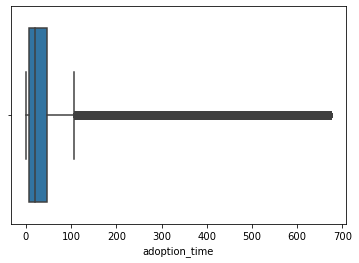

In [242]:
sns.boxplot(x=alldogs_year_otl['adoption_time'])

In [243]:
alldogs_year_otl['cg_adpt_time'].value_counts()

< 3 months     163853
< 1 week       160637
< 1 month      145553
1 - 2 weeks    137375
> 100 days      92404
Name: cg_adpt_time, dtype: int64

In [244]:
len(alldogs_year_otl[alldogs_year_otl['gender']=='Unknown'])

0

In [97]:
alldogs_nm = alldogs_year_otl[alldogs_year_otl['gender']!='Unknown']
len(alldogs_nm)

90628

In [246]:
# Check for any missing data
print("Table size -", end=' ')
print(alldogs_nm.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (alldogs_year_otl.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
missing_cols = [col for col in alldogs_year_otl.columns
                     if alldogs_year_otl[col].isnull().any()]

Table size - (90628, 33)
Checking for missing values..
attributes.declawed         699822
breeds.secondary            444452
coat                        223702
colors.primary              169294
colors.secondary            425529
colors.tertiary             687606
contact.address.postcode        16
environment.cats            568309
environment.children        486683
environment.dogs            452060
dtype: int64


In [250]:
alldogs_year_otl['contact.address.postcode'] = alldogs_year_otl['contact.address.postcode'].fillna(method='ffill')

C:\anaconda_python\envs\Insight\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [251]:
# Check for any missing data
print("Table size -", end=' ')
print(alldogs_nm.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (alldogs_year_otl.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
missing_cols = [col for col in alldogs_year_otl.columns
                     if alldogs_year_otl[col].isnull().any()]

Table size - (90628, 33)
Checking for missing values..
attributes.declawed     699822
breeds.secondary        444452
coat                    223702
colors.primary          169294
colors.secondary        425529
colors.tertiary         687606
environment.cats        568309
environment.children    486683
environment.dogs        452060
dtype: int64


In [120]:
#not needed for this set
#alldogs_nm = alldogs_merged.fillna({'name':'Unknown'})

In [99]:
# recheck for any missing data
print("Table size -", end=' ')
print(alldogs_nm.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (alldogs_nm.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
missing_cols = [col for col in alldogs_nm.columns
                     if alldogs_nm[col].isnull().any()]

Table size - (90628, 38)
Checking for missing values..
coat                    35414
breeds.secondary        52059
colors.primary          23938
colors.secondary        55765
colors.tertiary         88930
attributes.declawed     90628
environment.children    65588
environment.dogs        57343
environment.cats        75276
dtype: int64


In [253]:
alldogs_nm = alldogs_year_otl.drop(missing_cols, axis=1)

In [254]:
alldogs_nm.head()

,adoption_time,age,attributes.house_trained,attributes.shots_current,attributes.spayed_neutered,attributes.special_needs,breeds.mixed,breeds.primary,breeds.unknown,contact.address.city,...,organization_id,published_at,size,status,status_changed_at,tags,url,year,log_adpt_time,cg_adpt_time
1,96,Adult,True,True,True,False,False,Japanese Chin,False,Birmingham,...,CA712,2016-08-08T19:15:43+0000,Small,adopted,2016-11-13T08:14:08+0000,[],https://www.petfinder.com/dog/bess-located-in-...,2016,4.575741,> 100 days
2,98,Young,True,True,True,False,True,Scottish Terrier,False,Birmingham,...,TX1860,2014-10-14T09:20:08+0000,Small,adopted,2015-01-20T17:31:49+0000,[],https://www.petfinder.com/dog/madonna-30542160...,2015,4.596129,> 100 days
3,32,Adult,True,True,True,False,False,Bullmastiff,False,Birmingham,...,FL653,2018-02-21T00:02:35+0000,Extra Large,adopted,2018-03-25T13:18:45+0000,[],https://www.petfinder.com/dog/al-sweetie-birmi...,2018,3.499533,< 3 months
4,16,Young,True,True,True,False,False,Bullmastiff,False,Birmingham,...,FL653,2015-10-26T11:05:40+0000,Large,adopted,2015-11-11T18:28:03+0000,[],https://www.petfinder.com/dog/al-rosie-prattvi...,2015,2.839078,< 1 month
5,56,Adult,True,True,True,False,False,Bullmastiff,False,Birmingham,...,FL653,2016-06-24T16:49:40+0000,Extra Large,adopted,2016-08-20T13:23:19+0000,[],https://www.petfinder.com/dog/al-tank-montgome...,2016,4.044804,< 3 months


In [255]:
len(alldogs_nm)

699822

In [256]:
#remove negative days error
alldogs_nm = alldogs_nm[alldogs_nm['adoption_time']>=0]

In [257]:
len(alldogs_nm)

699822

In [102]:
alldogs_nm.columns

Index(['id', 'organization_id', 'url', 'age', 'gender', 'size', 'tags', 'name',
       'status', 'status_changed_at', 'published_at', 'distance',
       'breeds.primary', 'breeds.mixed', 'breeds.unknown',
       'attributes.spayed_neutered', 'attributes.house_trained',
       'attributes.special_needs', 'attributes.shots_current',
       'contact.address.city', 'contact.address.state',
       'contact.address.postcode', 'adoption_time', 'month', 'year',
       'log_adpt_time', 'mod_adpt_time', 'logmod_adpt_time', 'cg_adpt_time'],
      dtype='object')

In [258]:
namelist = alldogs_nm['name'].value_counts()
namelist.head()

Bella      2475
Daisy      2180
Buddy      2108
Max        2096
Charlie    1980
Name: name, dtype: int64

In [259]:
len(namelist)

178839

In [260]:
namelist[alldogs_nm['name'].iloc[89983]]/namelist.max()

0.00040404040404040404

In [261]:
maxname = namelist.max()

In [262]:
alldogs_nm[alldogs_nm['name'].isnull()]

,adoption_time,age,attributes.house_trained,attributes.shots_current,attributes.spayed_neutered,attributes.special_needs,breeds.mixed,breeds.primary,breeds.unknown,contact.address.city,...,organization_id,published_at,size,status,status_changed_at,tags,url,year,log_adpt_time,cg_adpt_time


In [107]:
def get_norm_name_freq(name):
    return namelist[name]/maxname
get_norm_name_freq(alldogs_nm['name'].iloc[0])

0.21978021978021978

In [108]:
alldogs_nm['norm_name_freq'] = alldogs_nm.apply(lambda x: get_norm_name_freq(x['name']), axis=1)
alldogs_nm.head()

,id,organization_id,url,age,gender,size,tags,name,status,status_changed_at,...,contact.address.state,contact.address.postcode,adoption_time,month,year,log_adpt_time,mod_adpt_time,logmod_adpt_time,cg_adpt_time,norm_name_freq
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,[],Sunny,adopted,2015-12-11T20:50:51+0000,...,CA,90013,19,12,2015,3.000720,1.903654,4.779123,< 1 month,0.219780
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,[],Batman,adopted,2015-12-21T22:23:16+0000,...,CA,90013,29,12,2015,3.404525,2.036168,4.859812,< 1 month,0.109890
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,[],Benji,adopted,2015-12-30T01:22:04+0000,...,CA,90013,18,12,2015,2.949688,1.888175,4.770685,< 1 month,0.267399
3,34042721,CA2395,https://www.petfinder.com/dog/zuma-34042721/ca...,Adult,Female,Medium,[],Zuma,adopted,2016-02-12T19:13:27+0000,...,CA,90013,57,2,2016,4.062166,2.290172,5.056246,< 100 days,0.025641
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,[],Diego,adopted,2015-12-30T01:21:59+0000,...,CA,90013,8,12,2015,2.208274,1.695218,4.682131,1 - 2 weeks,0.095238


In [263]:
breedlist = alldogs_nm['breeds.primary'].value_counts()
breedlist.head()

Labrador Retriever    86443
Chihuahua             51958
Pit Bull Terrier      41228
Terrier               34084
Shepherd              27418
Name: breeds.primary, dtype: int64

In [264]:
len(breedlist)

261

In [265]:
def get_norm_breed_freq(breed):
    return breedlist[breed]/breedlist.max()
alldogs_nm['breeds.primary'].iloc[0]
get_norm_breed_freq(alldogs_nm['breeds.primary'].iloc[0])

0.0032738336244693034

In [266]:
alldogs_nm['norm_breed_freq'] = alldogs_nm.apply(lambda x: get_norm_breed_freq(x['breeds.primary']), axis=1)
alldogs_nm.head()

,adoption_time,age,attributes.house_trained,attributes.shots_current,attributes.spayed_neutered,attributes.special_needs,breeds.mixed,breeds.primary,breeds.unknown,contact.address.city,...,published_at,size,status,status_changed_at,tags,url,year,log_adpt_time,cg_adpt_time,norm_breed_freq
1,96,Adult,True,True,True,False,False,Japanese Chin,False,Birmingham,...,2016-08-08T19:15:43+0000,Small,adopted,2016-11-13T08:14:08+0000,[],https://www.petfinder.com/dog/bess-located-in-...,2016,4.575741,> 100 days,0.003274
2,98,Young,True,True,True,False,True,Scottish Terrier,False,Birmingham,...,2014-10-14T09:20:08+0000,Small,adopted,2015-01-20T17:31:49+0000,[],https://www.petfinder.com/dog/madonna-30542160...,2015,4.596129,> 100 days,0.006918
3,32,Adult,True,True,True,False,False,Bullmastiff,False,Birmingham,...,2018-02-21T00:02:35+0000,Extra Large,adopted,2018-03-25T13:18:45+0000,[],https://www.petfinder.com/dog/al-sweetie-birmi...,2018,3.499533,< 3 months,0.006686
4,16,Young,True,True,True,False,False,Bullmastiff,False,Birmingham,...,2015-10-26T11:05:40+0000,Large,adopted,2015-11-11T18:28:03+0000,[],https://www.petfinder.com/dog/al-rosie-prattvi...,2015,2.839078,< 1 month,0.006686
5,56,Adult,True,True,True,False,False,Bullmastiff,False,Birmingham,...,2016-06-24T16:49:40+0000,Extra Large,adopted,2016-08-20T13:23:19+0000,[],https://www.petfinder.com/dog/al-tank-montgome...,2016,4.044804,< 3 months,0.006686


In [268]:
alldogs_nm['norm_breed_freq'].describe()

count    699822.000000
mean          0.306171
std           0.310070
min           0.000012
25%           0.066714
50%           0.168585
75%           0.476939
max           1.000000
Name: norm_breed_freq, dtype: float64

In [113]:
pd.qcut(alldogs_nm['norm_name_freq'], q=[0, 0.33, 0.67, 1], labels = ['Low', 'Medium', 'High'])

0           High
1           High
2           High
3         Medium
4           High
           ...  
184384      High
184385      High
184386    Medium
184387       Low
184388    Medium
Name: norm_name_freq, Length: 90628, dtype: category
Categories (3, object): [Low < Medium < High]

In [114]:
alldogs_nm['name_pop'] = pd.qcut(alldogs_nm['norm_name_freq'], q=[0, 0.33, 0.67, 1], labels = ['Low', 'Medium', 'High'])

In [115]:
alldogs_nm['name_pop'].value_counts()

Low       33137
High      29506
Medium    27985
Name: name_pop, dtype: int64

In [269]:
alldogs_nm['breed_pop'] = pd.qcut(alldogs_nm['norm_breed_freq'], q=[0, 0.33, 0.67, 1], labels = ['Low', 'Medium', 'High'])
alldogs_nm['breed_pop'].value_counts()

Medium    253565
Low       232544
High      213713
Name: breed_pop, dtype: int64

In [270]:
alldogs_nm.groupby('breed_pop')['adoption_time'].mean().sort_values()

breed_pop
Medium    42.957735
High      48.302658
Low       49.132697
Name: adoption_time, dtype: float64

In [118]:
alldogs_nm.groupby('name_pop')['adoption_time'].mean().sort_values()

name_pop
Medium    54.755297
Low       61.811087
High      62.200400
Name: adoption_time, dtype: float64

In [190]:
alldogs_nm.head()

,id,organization_id,url,age,gender,size,tags,name,status,status_changed_at,...,month,year,log_adpt_time,mod_adpt_time,logmod_adpt_time,cg_adpt_time,norm_name_freq,norm_breed_freq,name_pop,breed_pop
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,[],Sunny,adopted,2015-12-11T20:50:51+0000,...,12,2015,3.000720,1.903654,4.779123,< 1 month,0.219780,0.496316,High,High
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,[],Batman,adopted,2015-12-21T22:23:16+0000,...,12,2015,3.404525,2.036168,4.859812,< 1 month,0.109890,0.057746,High,Low
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,[],Benji,adopted,2015-12-30T01:22:04+0000,...,12,2015,2.949688,1.888175,4.770685,< 1 month,0.267399,0.018419,High,Low
3,34042721,CA2395,https://www.petfinder.com/dog/zuma-34042721/ca...,Adult,Female,Medium,[],Zuma,adopted,2016-02-12T19:13:27+0000,...,2,2016,4.062166,2.290172,5.056246,< 100 days,0.025641,0.001195,Medium,Low
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,[],Diego,adopted,2015-12-30T01:21:59+0000,...,12,2015,2.208274,1.695218,4.682131,1 - 2 weeks,0.095238,0.496316,High,High


In [271]:
breedsdf = alldogs_nm.loc[:,['breeds.primary','breed_pop']]
breedsdf.head()

,breeds.primary,breed_pop
1,Japanese Chin,Low
2,Scottish Terrier,Low
3,Bullmastiff,Low
4,Bullmastiff,Low
5,Bullmastiff,Low


In [272]:
breedsdf = breedsdf.drop_duplicates()

In [273]:
breedsdf.to_csv('breedlist_all.csv', header=False, index=False)

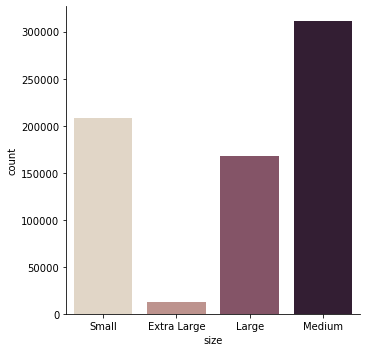

In [275]:
sns.catplot(x="size", kind="count", palette="ch:.25", data=alldogs_nm);

In [276]:
alldogs_nm.loc[alldogs_nm['size'] == 'Extra Large', 'size'] = 'Large'

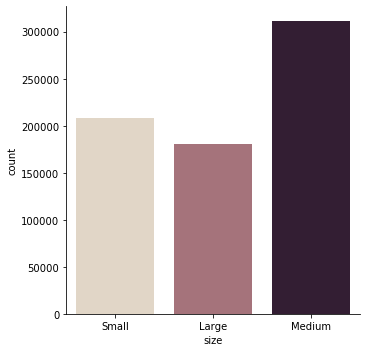

In [277]:
sns.catplot(x="size", kind="count", palette="ch:.25", data=alldogs_nm);

In [278]:
alldogs_nm.columns

Index(['adoption_time', 'age', 'attributes.house_trained',
       'attributes.shots_current', 'attributes.spayed_neutered',
       'attributes.special_needs', 'breeds.mixed', 'breeds.primary',
       'breeds.unknown', 'contact.address.city', 'contact.address.postcode',
       'contact.address.state', 'distance', 'gender', 'id', 'month', 'name',
       'organization_id', 'published_at', 'size', 'status',
       'status_changed_at', 'tags', 'url', 'year', 'log_adpt_time',
       'cg_adpt_time', 'norm_breed_freq', 'breed_pop'],
      dtype='object')

In [279]:
X_features = ['id','age', 'gender', 'size', 'breeds.primary',
              'breeds.mixed', 'attributes.spayed_neutered', 'attributes.house_trained',
              'attributes.special_needs', 'attributes.shots_current', 'contact.address.state', 
              'breed_pop', 'month']
X = alldogs_nm[X_features]
X.head()

,id,age,gender,size,breeds.primary,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,breed_pop,month
1,35898350,Adult,Female,Small,Japanese Chin,False,True,True,False,True,AL,Low,11
2,30542160,Young,Female,Small,Scottish Terrier,True,True,True,False,True,AL,Low,1
3,41000971,Adult,Female,Large,Bullmastiff,False,True,True,False,True,AL,Low,3
4,33618001,Young,Female,Large,Bullmastiff,False,True,True,False,True,AL,Low,11
5,35479179,Adult,Male,Large,Bullmastiff,False,True,True,False,True,AL,Low,8


In [21]:
X['age'].value_counts()

Young     55488
Baby      51911
Adult     40256
Senior     3829
Name: age, dtype: int64

In [22]:
X['gender'].value_counts()

Male      76377
Female    75107
Name: gender, dtype: int64

In [23]:
X['size'].value_counts()

Medium         60828
Small          58982
Large          29530
Extra Large     2144
Name: size, dtype: int64

In [24]:
X['contact.address.state'].value_counts()

NY    40526
TX    38231
MN    36721
CA    36006
Name: contact.address.state, dtype: int64

In [121]:
X.head()

,id,age,gender,size,breeds.primary,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,name_pop,breed_pop,month
0,33853923,Baby,Female,Small,Terrier,True,True,True,False,True,CA,High,High,12
1,33853969,Young,Male,Small,Rat Terrier,False,True,True,False,True,CA,High,Low,12
2,34004290,Young,Male,Medium,Parson Russell Terrier,False,True,False,False,True,CA,High,Low,12
3,34042721,Adult,Female,Medium,Xoloitzcuintli / Mexican Hairless,False,True,False,False,True,CA,Medium,Low,2
4,34079567,Young,Male,Medium,Terrier,True,True,False,False,True,CA,High,High,12


In [280]:
y = alldogs_nm['cg_adpt_time']

In [281]:
len(X)

699822

In [284]:
cat_col = ['age','gender','size','contact.address.state', 'breed_pop', 'month']

In [285]:
X[cat_col]=X[cat_col].astype('category')

C:\anaconda_python\envs\Insight\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [289]:
total = pd.concat([X,y], axis=1)
total.head()

,id,age,gender,size,breeds.primary,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,breed_pop,month,cg_adpt_time
1,35898350,Adult,Female,Small,Japanese Chin,False,True,True,False,True,AL,Low,11,> 100 days
2,30542160,Young,Female,Small,Scottish Terrier,True,True,True,False,True,AL,Low,1,> 100 days
3,41000971,Adult,Female,Large,Bullmastiff,False,True,True,False,True,AL,Low,3,< 3 months
4,33618001,Young,Female,Large,Bullmastiff,False,True,True,False,True,AL,Low,11,< 1 month
5,35479179,Adult,Male,Large,Bullmastiff,False,True,True,False,True,AL,Low,8,< 3 months


In [288]:
X.dtypes

id                               int64
age                           category
gender                        category
size                          category
breeds.primary                  object
breeds.mixed                      bool
attributes.spayed_neutered        bool
attributes.house_trained          bool
attributes.special_needs          bool
attributes.shots_current          bool
contact.address.state         category
breed_pop                     category
month                         category
dtype: object

In [127]:
len(total)

90628

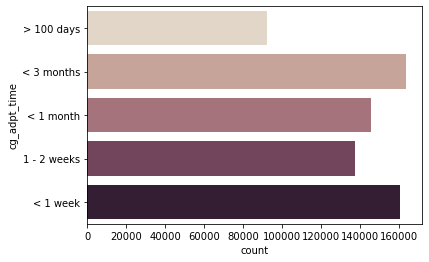

In [290]:
timeplot = sns.countplot(y='cg_adpt_time', data=total, palette="ch:.25")

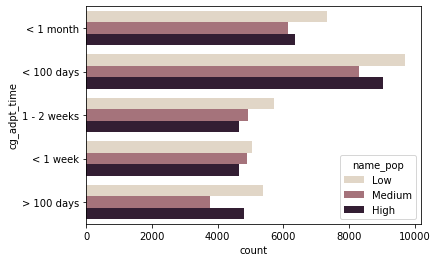

In [166]:
nameplot = sns.countplot(y='cg_adpt_time', hue='name_pop', data=total, palette="ch:.25")

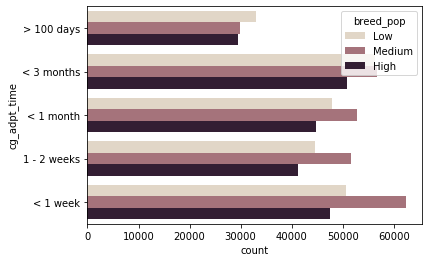

In [291]:
breedplot = sns.countplot(y='cg_adpt_time', hue='breed_pop', data=total, palette="ch:.25")

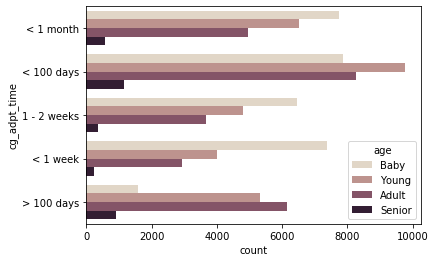

In [168]:
ageplot = sns.countplot(y='cg_adpt_time', hue='age', data=total, palette="ch:.25")

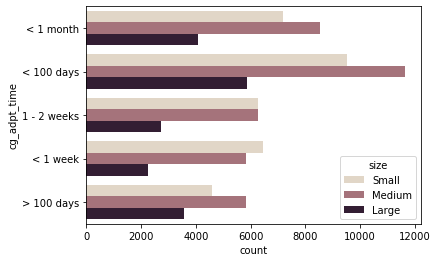

In [169]:
ageplot = sns.countplot(y='cg_adpt_time', hue='size', data=total, palette="ch:.25")

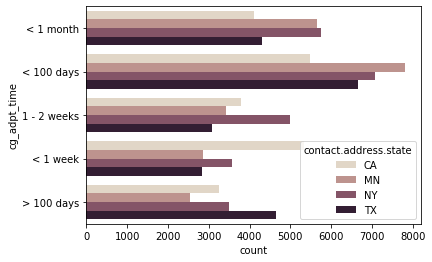

In [170]:
ageplot = sns.countplot(y='cg_adpt_time', hue='contact.address.state', data=total, palette="ch:.25")

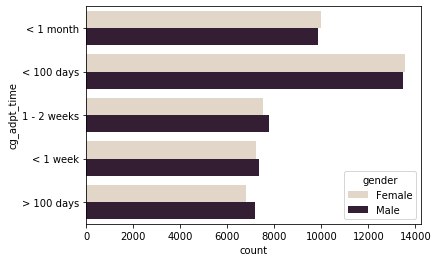

In [171]:
ageplot = sns.countplot(y='cg_adpt_time', hue='gender', data=total, palette="ch:.25")

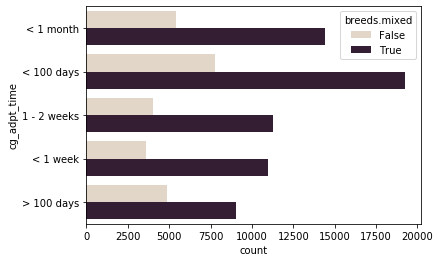

In [172]:
ageplot = sns.countplot(y='cg_adpt_time', hue='breeds.mixed', data=total, palette="ch:.25")

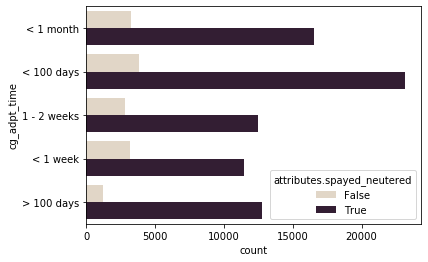

In [173]:
ageplot = sns.countplot(y='cg_adpt_time', hue='attributes.spayed_neutered', data=total, palette="ch:.25")

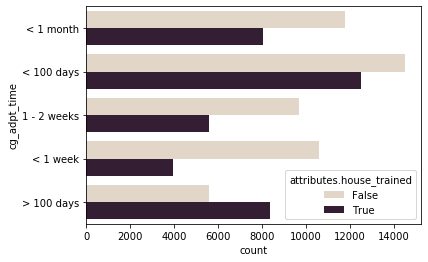

In [174]:
ageplot = sns.countplot(y='cg_adpt_time', hue='attributes.house_trained', data=total, palette="ch:.25")

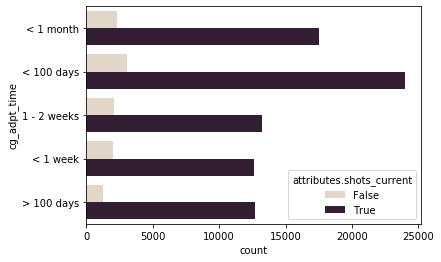

In [175]:
ageplot = sns.countplot(y='cg_adpt_time', hue='attributes.shots_current', data=total, palette="ch:.25")

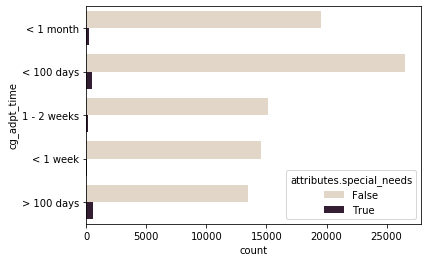

In [176]:
ageplot = sns.countplot(y='cg_adpt_time', hue='attributes.special_needs', data=total, palette="ch:.25")

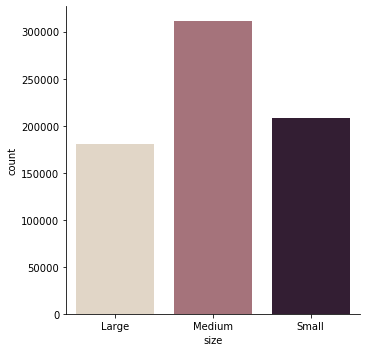

In [292]:
sns.catplot(x="size", kind="count", palette="ch:.25", data=total);

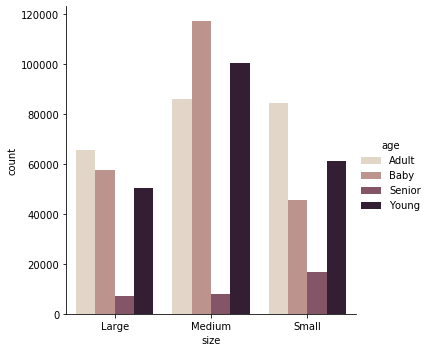

In [293]:
sns.catplot(x="size", kind="count", hue="age", palette="ch:.25", data=total);

<Figure size 864x4608 with 0 Axes>

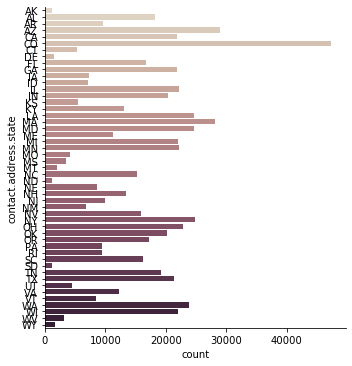

In [299]:
plt.figure(figsize=(12, 64))
sns.catplot(y="contact.address.state", kind="count", palette="ch:.25", data=total);

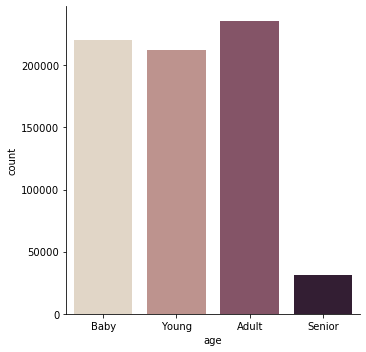

In [300]:
sns.catplot(x="age", kind="count", palette="ch:.25",order=["Baby", "Young", "Adult", "Senior"], data=total);

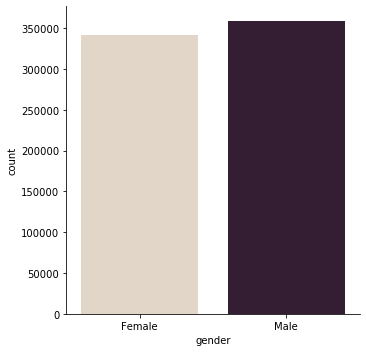

In [301]:
sns.catplot(x="gender", kind="count", palette="ch:.25", data=total);

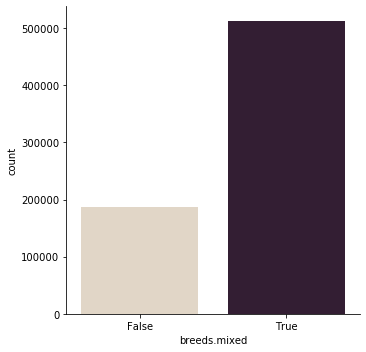

In [302]:
sns.catplot(x="breeds.mixed", kind="count", palette="ch:.25", data=total);

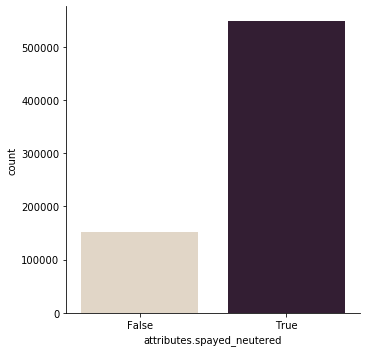

In [303]:
sns.catplot(x="attributes.spayed_neutered", kind="count", palette="ch:.25", data=total);

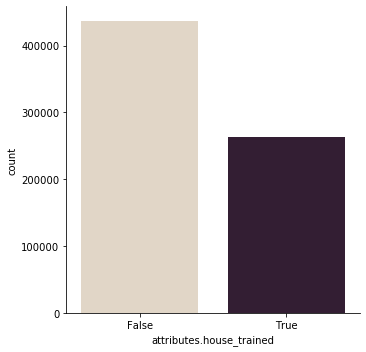

In [304]:
sns.catplot(x="attributes.house_trained", kind="count", palette="ch:.25", data=total);

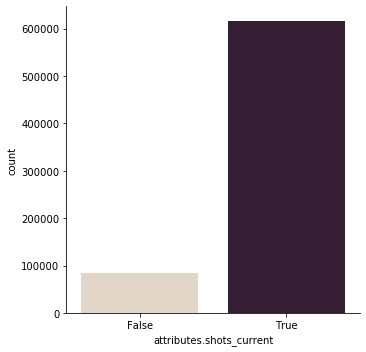

In [305]:
sns.catplot(x="attributes.shots_current", kind="count", palette="ch:.25", data=total);

In [307]:
from sklearn.model_selection import train_test_split
#trainval_X, test_X, trainval_y, test_y = train_test_split(X, y, test_size=0.2)
#use log_adpt_time as feature
trainval_X, test_X, trainval_y, test_y = train_test_split(X, total['cg_adpt_time'], test_size=0.2)
print('Training set size = {} and Test set size = {}'.format(len(trainval_X),len(test_X)))

Training set size = 559857 and Test set size = 139965


In [69]:
X.head()

,age,gender,size,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.shots_current,contact.address.state
0,Baby,Female,Small,True,True,True,True,CA
1,Young,Male,Small,False,True,True,True,CA
2,Young,Male,Medium,False,True,False,True,CA
3,Adult,Female,Medium,False,True,False,True,CA
4,Young,Male,Medium,True,True,False,True,CA


In [308]:
total_test = pd.concat([test_X,test_y], axis=1)

In [309]:
export = total_test.to_csv('./data/test_set_all.csv', header=True, index = False)

In [310]:
total_trainval = pd.concat([trainval_X,trainval_y], axis=1)

In [311]:
export = total_trainval.to_csv('./data/trainval_set_all.csv', header=True, index = False)

In [147]:
#from scipy import stats

In [169]:
#bc_adpt_time,lmbda = stats.boxcox((total['adoption_time']+1))

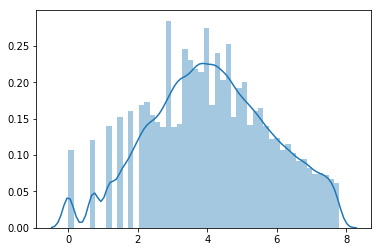

In [170]:
#sns.distplot(bc_adpt_time)

In [171]:
#lmbda

0.13720434611179522

In [172]:
#from scipy.special import boxcox,inv_boxcox

[Text(0, 0.5, 'count'), Text(0.5, 0, 'transformed time')]

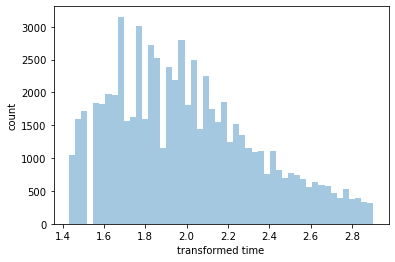

In [251]:
tf_adpt_time = total.apply(lambda x: np.power(((x['adoption_time'])+6),(0.2)), axis=1)
ax = sns.distplot(tf_adpt_time, kde=False)
ax.set(xlabel='transformed time', ylabel='count')

In [86]:
total.head()

,age,gender,size,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,adoption_time
0,Baby,Female,Small,True,True,True,False,True,CA,19
1,Young,Male,Small,False,True,True,False,True,CA,29
2,Young,Male,Medium,False,True,False,False,True,CA,18
3,Adult,Female,Medium,False,True,False,False,True,CA,57
4,Young,Male,Medium,True,True,False,False,True,CA,8


In [87]:
len(X)

153436

In [252]:
total['mod_adpt_time'] = total.apply(lambda x: np.power(((x['adoption_time'])+6),(0.2)), axis=1)

In [186]:
from sklearn.model_selection import train_test_split
#trainval_X, test_X, trainval_y, test_y = train_test_split(X, y, test_size=0.2)
#use log_adpt_time as feature
trainval_X, test_X, trainval_y, test_y = train_test_split(X, total['cg_adpt_time'], test_size=0.2)
print('Training set size = {} and Test set size = {}'.format(len(trainval_X),len(test_X)))

Training set size = 72502 and Test set size = 18126


In [187]:
total_test = pd.concat([test_X,test_y], axis=1)
export = total_test.to_csv('./data/test_set_scoped_cg.csv', header=True, index = False)
total_trainval = pd.concat([trainval_X,trainval_y], axis=1)
export = total_trainval.to_csv('./data/trainval_set_scoped_cg.csv', header=True, index = False)